# Que1

In [3]:
import pandas as pd

In [4]:
data = pd.read_table("people.txt")

In [5]:
data

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [6]:
#Age Range 0 to 150

rule1 = (data.age > 0) & (data.age < 100)     
rule1

0     True
1     True
2     True
3    False
4     True
Name: age, dtype: bool

In [7]:
#Age should be greater than years married

rule2 = (data.age>data.yearsmarried)   
rule2

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [8]:
#status should be single, married or widowed

rule3 = ((data.status == "single") | (data.status=="married") | (data.status=="widowed")) 
rule3

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool

In [9]:
#classifying agegroups as child, adult and elderly

rule4 = (((data.age>=0)&(data.age<18)&(data.agegroup=="child")) | (((data.age>=18)&(data.age<65))&(data.agegroup=="adult")) | (((data.age>=65)&(data.age<150))&(data.agegroup=="elderly")))
rule4
            

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [10]:
# iii - check whether ruleset is violated by people.txt

invalidData = [{"invalidrule1" : len(data)-rule1.sum(),
               "invalidrule2" : len(data)-rule2.sum(),
               "invalidrule3" : len(data)-rule3.sum(),
               "invalidrule4" : len(data)-rule4.sum()}]
invalidData

[{'invalidrule1': 1, 'invalidrule2': 1, 'invalidrule3': 0, 'invalidrule4': 2}]

In [11]:
#iv - summary
invaliddf = pd.DataFrame(invalidData, index = ["invalid_count"])
invaliddf

,invalidrule1,invalidrule2,invalidrule3,invalidrule4
invalid_count,1,1,0,2


<Axes: >

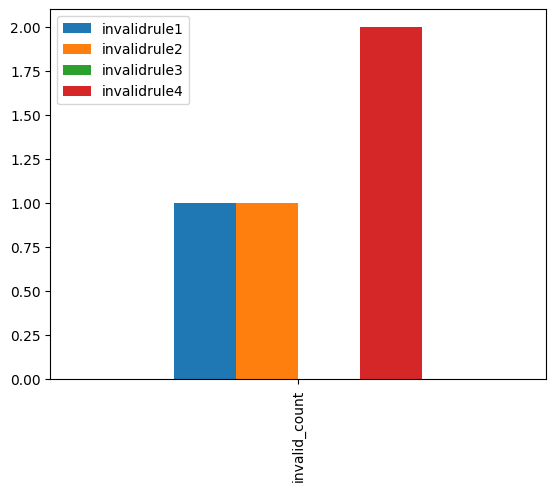

In [12]:
#v - visualization
invaliddf.plot(kind="bar")